## TASK 1

### Load Dataset

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df=pd.read_csv('hotel_bookings_data.csv')
pd.set_option('display.max_columns',None)
df.sample(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
70839,City Hotel,1,233,2019,August,25,23,1,2,2,0.0,0,Breakfast,Kota Denpasar,Groups,TA/TO,0,0,0,0,Non Refund,20.0,NaN,0,Personal,105.0,0,0,Canceled
92159,City Hotel,0,14,2018,September,27,1,0,1,1,0.0,0,Breakfast,Kota Cimahi,Direct,Direct,0,0,0,1,No Deposit,14.0,NaN,0,Personal,141.0,0,3,Check-Out
85512,City Hotel,0,3,2019,September,28,13,0,1,1,0.0,0,Breakfast,Kota Denpasar,Corporate,Corporate,1,0,2,0,No Deposit,NaN,219.0,0,Personal,95.0,0,0,Check-Out
45684,City Hotel,0,140,2017,January,47,18,0,3,2,0.0,0,Breakfast,Kota Denpasar,Groups,TA/TO,0,0,0,0,No Deposit,29.0,NaN,87,Family,75.0,0,0,Check-Out
92340,City Hotel,0,49,2018,August,27,29,2,4,2,1.0,0,Breakfast,Kabupaten Kepulauan Seribu,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,NaN,0,Personal,134.1,0,0,Check-Out
75530,City Hotel,1,355,2017,December,41,7,0,2,2,0.0,0,Breakfast,Kota Denpasar,Groups,TA/TO,0,1,0,0,Non Refund,1.0,NaN,0,Family,62.0,0,0,Canceled
107920,City Hotel,0,81,2019,May,11,17,1,2,2,0.0,0,Breakfast,Kota Yogyakarta,Online TA,TA/TO,0,0,0,0,No Deposit,8.0,NaN,0,Personal,97.2,0,1,Check-Out
70065,City Hotel,1,178,2019,August,23,9,0,2,2,0.0,0,Breakfast,Kota Denpasar,Groups,TA/TO,0,0,0,0,Non Refund,86.0,NaN,0,Personal,130.0,0,0,Canceled
74965,City Hotel,1,164,2017,October,33,14,0,1,2,0.0,0,Breakfast,Kota Denpasar,Groups,TA/TO,0,1,0,0,No Deposit,1.0,NaN,0,Personal,12.0,0,0,Canceled
115395,City Hotel,0,405,2019,September,27,4,0,2,2,0.0,0,Dinner,Kabupaten Bandung,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,6.0,NaN,0,Family,114.4,0,0,Check-Out


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df.duplicated().sum()

33261

In [5]:
missing_value=df.isnull().sum().sort_values(ascending=False)[:8]
missing_value

company                        112593
agent                           16340
city                              488
children                            4
hotel                               0
is_repeated_guest                   0
total_of_special_requests           0
required_car_parking_spaces         0
dtype: int64

In [7]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2018.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2018.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Handle Missing Value

#### Columns Childern
To replace empty data with a value of 0, assuming that people who did not fill it in do not have children

In [8]:
df["children"].fillna(0, inplace=True)

In [7]:
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
33474,Resort Hotel,0,60,2019,April,8,21,0,4,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Family,48.0,0,0,Check-Out
98894,City Hotel,0,16,2018,December,41,5,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,310.0,NaN,0,Personal,129.0,0,1,Check-Out
56156,City Hotel,1,46,2018,October,36,30,1,5,2,0.0,0,Breakfast,Kabupaten Karawang,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,NaN,0,Personal,123.3,0,0,Canceled
40143,City Hotel,1,114,2017,September,28,11,2,1,2,0.0,0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,8.0,NaN,0,Personal,76.5,0,0,Canceled
36395,Resort Hotel,0,119,2019,July,19,7,4,9,2,0.0,0,Full Board,Kabupaten Bangka,Online TA,TA/TO,0,0,0,1,No Deposit,314.0,NaN,0,Family,118.8,0,0,Check-Out


In [9]:
missing_value=df.isnull().sum().sort_values(ascending=False)[:8]
missing_value

company                        112593
agent                           16340
city                              488
hotel                               0
distribution_channel                0
total_of_special_requests           0
required_car_parking_spaces         0
adr                                 0
dtype: int64

#### Columns City
Using the mode value to fill in missing values because it provides the most common value.

In [11]:
modus_city = df["city"].mode().values[0]
modus_city

'Kota Denpasar'

In [10]:
# Mengisi nilai null di kolom "city" dengan nilai modus
modus_city = df["city"].mode().values[0]
df["city"].fillna(modus_city, inplace=True)


In [15]:
df.sample(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
100869,City Hotel,0,200,2018,December,45,31,1,2,2,0.0,0,Breakfast,Kabupaten Sumedang,Online TA,TA/TO,0,0,0,1,No Deposit,9.0,NaN,0,Personal,82.92,0,3,Check-Out
51617,City Hotel,0,144,2018,July,22,22,2,3,2,0.0,0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,NaN,0,Family,112.03,0,1,Check-Out
66127,City Hotel,1,147,2019,June,15,14,1,2,2,0.0,0,Breakfast,Kabupaten Belitung,Online TA,TA/TO,0,0,0,2,No Deposit,9.0,NaN,0,Personal,136.50,0,2,Canceled
21549,Resort Hotel,0,2,2018,May,10,1,0,2,2,0.0,0,Breakfast,Kota Bengkulu,Direct,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,65.00,0,0,Check-Out
83158,City Hotel,0,0,2018,March,4,21,0,1,2,0.0,0,No Meal,Kota Denpasar,Direct,Direct,0,0,0,1,No Deposit,NaN,NaN,0,Personal,79.00,0,0,Check-Out
78633,City Hotel,1,14,2017,December,42,15,0,1,1,0.0,0,Breakfast,Kota Denpasar,Offline TA/TO,TA/TO,0,1,0,0,No Deposit,99.0,NaN,0,Family,100.00,0,0,Canceled
92492,City Hotel,0,4,2018,September,28,6,0,1,2,1.0,0,No Meal,Kota Yogyakarta,Online TA,TA/TO,0,0,0,0,No Deposit,89.0,NaN,0,Personal,100.08,0,1,Check-Out
34,Resort Hotel,1,45,2017,September,27,2,1,3,3,0.0,0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,241.0,NaN,0,Personal,108.80,0,1,Canceled
51440,City Hotel,1,3,2018,July,21,20,0,1,2,0.0,0,Breakfast,Kabupaten Kepulauan Seribu,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,NaN,0,Personal,156.00,0,0,Canceled
102554,City Hotel,0,0,2018,January,49,28,1,2,1,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,1,No Deposit,14.0,NaN,0,Family,65.00,0,0,Check-Out


In [12]:
missing_value=df.isnull().sum().sort_values(ascending=False)[:8]
missing_value

company                        112593
agent                           16340
hotel                               0
distribution_channel                0
total_of_special_requests           0
required_car_parking_spaces         0
adr                                 0
customer_type                       0
dtype: int64

#### Kolom Agent and Company
Filling with the value of 0, assuming there is no agent ID and company ID.

In [13]:
## If no id of agent or company is null, just replace it with 0
df[['agent','company']] = df[['agent','company']].fillna(0.0)

In [14]:
df.sample(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
9086,Resort Hotel,1,31,2018,December,44,27,0,3,2,0.0,0,Breakfast,Kota Batu,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0.0,0,Personal,75.00,0,2,Canceled
79541,City Hotel,1,16,2017,January,45,4,0,2,1,0.0,0,Breakfast,Kota Denpasar,Corporate,Corporate,0,1,0,0,Non Refund,0.0,122.0,0,Personal,95.00,0,0,Canceled
76727,City Hotel,0,5,2019,September,27,4,0,3,1,0.0,0,Breakfast,Kota Denpasar,Corporate,Corporate,1,6,68,1,No Deposit,0.0,40.0,0,Personal,65.00,0,1,Check-Out
56738,City Hotel,1,25,2018,November,38,12,1,0,1,0.0,0,Breakfast,Kota Yogyakarta,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0.0,0,Personal,108.00,0,0,Canceled
119223,City Hotel,0,6,2019,October,35,28,1,3,2,2.0,0,Breakfast,Kota Yogyakarta,Online TA,TA/TO,0,0,0,1,No Deposit,7.0,0.0,0,Personal,190.00,0,1,Check-Out
55573,City Hotel,1,148,2018,October,34,16,2,5,2,0.0,0,Breakfast,Kabupaten Ciamis,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0.0,0,Personal,119.69,0,0,Canceled
116016,City Hotel,0,164,2019,September,28,12,0,2,3,0.0,0,Breakfast,Kota Semarang,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0.0,0,Personal,152.10,0,0,Check-Out
48455,City Hotel,0,107,2018,May,13,23,2,5,0,2.0,0,Breakfast,Kabupaten Sumedang,Direct,Direct,0,0,0,0,No Deposit,14.0,0.0,0,Family,75.00,0,1,Check-Out
102388,City Hotel,0,141,2018,January,48,25,0,2,2,0.0,0,Breakfast,Kabupaten Belitung,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0.0,0,Personal,90.00,0,0,Check-Out
26989,Resort Hotel,0,45,2018,October,34,14,2,0,2,0.0,0,Dinner,Kota Batu,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0.0,0,Personal,243.00,0,1,Check-Out


In [15]:
missing_value=df.isnull().sum().sort_values(ascending=False)[:8]
missing_value

hotel                          0
distribution_channel           0
total_of_special_requests      0
required_car_parking_spaces    0
adr                            0
customer_type                  0
days_in_waiting_list           0
company                        0
dtype: int64

### Replacing Inaccurate Values
Replacing undefined values in the "meal" column with the value "no meal."



In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [17]:
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
111206,City Hotel,0,26,2019,July,19,7,1,0,1,0.0,0,Breakfast,Kabupaten Belitung,Direct,Direct,0,0,0,0,No Deposit,0.0,0.0,0,Personal,149.00,0,0,Check-Out
37999,Resort Hotel,0,0,2019,September,27,5,0,1,2,0.0,0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0.0,0,Family,113.00,0,0,Check-Out
89129,City Hotel,0,97,2018,July,21,16,1,1,2,0.0,0,Breakfast,Kota Yogyakarta,Offline TA/TO,TA/TO,0,0,0,1,No Deposit,118.0,0.0,0,Personal,80.75,0,0,Check-Out
4221,Resort Hotel,0,211,2018,April,9,26,2,5,1,0.0,0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,1,No Deposit,240.0,0.0,0,Personal,25.11,0,2,Check-Out
44060,City Hotel,1,92,2017,November,40,30,0,1,2,0.0,0,Breakfast,Kota Denpasar,Groups,TA/TO,0,0,0,0,Non Refund,1.0,0.0,0,Personal,170.00,0,0,Canceled


In [18]:
unique_meal_values = df['meal'].unique()
print(unique_meal_values)

['Breakfast' 'Full Board' 'Dinner' 'No Meal']


In [19]:
# Mengganti nilai yang tidak sesuai dalam kolom "meal"
df['meal'] = df['meal'].replace('Undefined', 'No Meal')

In [20]:
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
53478,City Hotel,1,23,2018,August,26,21,0,3,2,0.0,0,Breakfast,Kabupaten Belitung,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0.0,0,Personal,127.67,0,0,Canceled
38508,Resort Hotel,0,152,2019,September,28,11,2,7,2,0.0,0,Dinner,Kabupaten Kuningan,Offline TA/TO,TA/TO,0,0,0,1,No Deposit,75.0,0.0,0,Personal,130.05,0,0,Check-Out
81834,City Hotel,1,178,2018,June,18,28,0,3,1,0.0,0,Breakfast,Kota Denpasar,Offline TA/TO,TA/TO,0,1,0,0,Non Refund,19.0,0.0,46,Personal,110.00,0,0,Canceled
19022,Resort Hotel,0,18,2017,February,49,5,1,1,3,2.0,0,Breakfast,Kota Batu,Direct,Direct,0,0,0,0,No Deposit,250.0,0.0,0,Personal,93.00,0,0,Check-Out
69667,City Hotel,1,348,2019,August,22,3,2,1,2,0.0,0,Breakfast,Kota Denpasar,Offline TA/TO,TA/TO,0,0,0,0,Non Refund,6.0,0.0,0,Personal,90.00,0,0,Canceled


In [21]:
unique_meal_values = df['meal'].unique()
print(unique_meal_values)

['Breakfast' 'Full Board' 'Dinner' 'No Meal']


### Dropping Unnecessary Data



In [22]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
5,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0.0,0,Personal,98.00,0,1,Check-Out
22,Resort Hotel,0,72,2017,September,27,1,2,4,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,1,No Deposit,250.0,0.0,0,Personal,84.67,0,1,Check-Out
43,Resort Hotel,0,70,2017,September,27,2,2,3,2,0.0,0,Dinner,Kabupaten Tangerang,Direct,Direct,0,0,0,0,No Deposit,250.0,0.0,0,Personal,137.00,0,1,Check-Out
138,Resort Hotel,1,5,2017,September,28,5,1,0,2,0.0,0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0.0,0,Personal,97.00,0,0,Canceled
200,Resort Hotel,0,0,2017,September,28,7,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0.0,0,Personal,109.80,0,3,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2019,October,35,31,0,3,2,0.0,0,Breakfast,Kabupaten Bandung,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0.0,0,Personal,126.00,0,2,Check-Out
119352,City Hotel,0,63,2019,October,35,31,0,3,3,0.0,0,Breakfast,Kota Surabaya,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0.0,0,Family,195.33,0,2,Check-Out
119353,City Hotel,0,63,2019,October,35,31,0,3,3,0.0,0,Breakfast,Kota Surabaya,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0.0,0,Family,195.33,0,2,Check-Out
119354,City Hotel,0,63,2019,October,35,31,0,3,3,0.0,0,Breakfast,Kota Surabaya,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0.0,0,Family,195.33,0,2,Check-Out


In [23]:
# drop data duplicate
df_cleaned = df.drop_duplicates()

In [24]:
jumlah_duplikat_terhapus = len(df) - len(df_cleaned)
print(f"Jumlah data duplikat yang dihapus: {jumlah_duplikat_terhapus} baris")

Jumlah data duplikat yang dihapus: 33282 baris


In [25]:
# Saving the cleaned dataset to a new file.
df_cleaned.to_csv('hotel_bookings_data_bersih.csv', index=False)

## TASK 2

In [36]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.patches as patches

In [19]:
df=pd.read_csv('hotel_bookings_data_bersih.csv')
pd.set_option('display.max_columns',None)
df.sample(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
70178,City Hotel,0,101,2018,December,44,24,1,2,2,0.0,0,Breakfast,Kabupaten Pangandaran,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0.0,0,Personal,100.20,0,4,Check-Out
32997,Resort Hotel,0,32,2019,October,33,13,2,5,2,1.0,0,Breakfast,Kabupaten Tangerang,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,11.0,0.0,0,Personal,202.50,0,3,Check-Out
1746,Resort Hotel,1,89,2017,November,38,17,2,3,2,0.0,0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0.0,0,Personal,89.00,0,2,Canceled
22797,Resort Hotel,0,247,2018,November,38,14,0,1,2,0.0,0,Breakfast,Kabupaten Sumedang,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,251.0,0.0,0,Personal,86.00,0,0,Check-Out
61868,City Hotel,0,106,2018,July,23,29,2,1,2,0.0,0,Breakfast,Kabupaten Bandung,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,27.0,0.0,0,Family,80.75,0,1,Check-Out
59990,City Hotel,0,161,2018,June,17,22,1,2,2,0.0,0,Breakfast,Kabupaten Kepulauan Seribu,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,23.0,0.0,0,Family,80.00,0,0,Check-Out
47273,City Hotel,1,0,2019,June,15,9,1,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,0.0,0.0,0,Personal,12.00,0,0,Canceled
49310,City Hotel,1,192,2019,August,23,8,0,3,2,0.0,0,Breakfast,Kota Denpasar,Offline TA/TO,TA/TO,0,0,0,0,Non Refund,19.0,0.0,23,Personal,170.00,0,0,Canceled
6236,Resort Hotel,1,18,2018,November,39,22,0,2,2,0.0,0,Breakfast,Kabupaten Bandung,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0.0,0,Personal,134.00,0,0,Canceled
35943,City Hotel,0,61,2017,December,43,19,1,4,2,0.0,0,Breakfast,Kota Yogyakarta,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0.0,0,Contract,89.25,0,2,Check-Out


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86108 entries, 0 to 86107
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           86108 non-null  object 
 1   is_canceled                     86108 non-null  int64  
 2   lead_time                       86108 non-null  int64  
 3   arrival_date_year               86108 non-null  int64  
 4   arrival_date_month              86108 non-null  object 
 5   arrival_date_week_number        86108 non-null  int64  
 6   arrival_date_day_of_month       86108 non-null  int64  
 7   stays_in_weekend_nights         86108 non-null  int64  
 8   stays_in_weekdays_nights        86108 non-null  int64  
 9   adults                          86108 non-null  int64  
 10  children                        86108 non-null  float64
 11  babies                          86108 non-null  int64  
 12  meal                            

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,86108.0,0.275642,0.446840,0.00,0.00,0.0,1.00,1.0
lead_time,86108.0,79.262624,85.502167,0.00,11.00,49.0,124.00,737.0
arrival_date_year,86108.0,2018.215450,0.683960,2017.00,2018.00,2018.0,2019.00,2019.0
arrival_date_week_number,86108.0,26.798242,13.673681,1.00,16.00,27.0,37.00,53.0
arrival_date_day_of_month,86108.0,15.806313,8.840024,1.00,8.00,16.0,23.00,31.0
stays_in_weekend_nights,86108.0,1.009895,1.033448,0.00,0.00,1.0,2.00,19.0
stays_in_weekdays_nights,86108.0,2.633518,2.058427,0.00,1.00,2.0,4.00,50.0
adults,86108.0,1.878687,0.627533,0.00,2.00,2.0,2.00,55.0
children,86108.0,0.140312,0.458388,0.00,0.00,0.0,0.00,10.0
babies,86108.0,0.010986,0.114435,0.00,0.00,0.0,0.00,10.0


### The aggregate table that shows the comparison of hotel bookings each month based on hotel types


In [22]:
df.groupby(['hotel','arrival_date_month']).agg({'is_canceled':'count','arrival_date_year':'unique'})

is_canceled   arrival_date_year
hotel        arrival_date_month                                 
City Hotel   April                      3560        [2018, 2019]
             August                     4927        [2018, 2019]
             December                   4059        [2017, 2018]
             February                   2983        [2017, 2018]
             January                    2895        [2017, 2018]
             July                       5345        [2018, 2019]
             June                       5035        [2018, 2019]
             March                      2698        [2018, 2019]
             May                        4821        [2018, 2019]
             November                   4063        [2017, 2018]
             October                    6503  [2017, 2018, 2019]
             September                  5686  [2017, 2018, 2019]
Resort Hotel April                      2469        [2018, 2019]
             August                     2730        [2018, 2019]
             December                   2658        [2017, 2018]
             February                   2096        [2017, 2018]
             January                    2028        [2017, 2018]
             July                       2897        [2018, 2019]
             June                       2773        [2018, 2019]
             March                      1931        [2018, 2019]
             May                        2611        [2018, 2019]
             November                   2394        [2017, 2018]
             October                    4647  [2017, 2018, 2019]
             September                  4299  [2017, 2018, 2019]

### Lakukan Normalisasi dan Urutkan Berdasarkan Bulan
Normalisasi ini dilakukan dengan membagi total pemesanan (jumlah pemesanan hotel) dengan jumlah tahun (jumlah tahun kedatangan) untuk setiap bulan. Dengan cara ini, dapat membandingkan kinerja hotel pada berbagai bulan dengan lebih adil, tanpa dipengaruhi oleh perbedaan jumlah tahun kedatangan.

In [25]:
norm_df = df.groupby(['hotel','arrival_date_month']).agg({'is_canceled':'count','arrival_date_year':'nunique'}).reset_index()
norm_df['reservation'] = norm_df['is_canceled']/norm_df['arrival_date_year']
norm_df

,hotel,arrival_date_month,is_canceled,arrival_date_year,reservation
0,City Hotel,April,3560,2,1780.000000
1,City Hotel,August,4927,2,2463.500000
2,City Hotel,December,4059,2,2029.500000
3,City Hotel,February,2983,2,1491.500000
4,City Hotel,January,2895,2,1447.500000
5,City Hotel,July,5345,2,2672.500000
6,City Hotel,June,5035,2,2517.500000
7,City Hotel,March,2698,2,1349.000000
8,City Hotel,May,4821,2,2410.500000
9,City Hotel,November,4063,2,2031.500000


### Sort based on month

In [30]:
# Urutkan data berdasarkan bulan 
month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

norm_df['hotel'] = norm_df['hotel'].astype('category')
norm_df['arrival_date_month'] = norm_df['arrival_date_month'].astype('category')
norm_df['arrival_date_month'] = norm_df['arrival_date_month'].cat.set_categories(month_list)

#sorting data
norm_df = norm_df.sort_values(['hotel','arrival_date_month'])

#Menyingkat nama bulan untuk visualisasi
norm_df['month'] = norm_df['arrival_date_month'].apply(lambda x: x[:3])
norm_df

,hotel,arrival_date_month,is_canceled,arrival_date_year,reservation,month
4,City Hotel,January,2895,2,1447.500000,Jan
3,City Hotel,February,2983,2,1491.500000,Feb
7,City Hotel,March,2698,2,1349.000000,Mar
0,City Hotel,April,3560,2,1780.000000,Apr
8,City Hotel,May,4821,2,2410.500000,May
6,City Hotel,June,5035,2,2517.500000,Jun
5,City Hotel,July,5345,2,2672.500000,Jul
1,City Hotel,August,4927,2,2463.500000,Aug
11,City Hotel,September,5686,3,1895.333333,Sep
10,City Hotel,October,6503,3,2167.666667,Oct


### Plot kenaikan dan penurunan

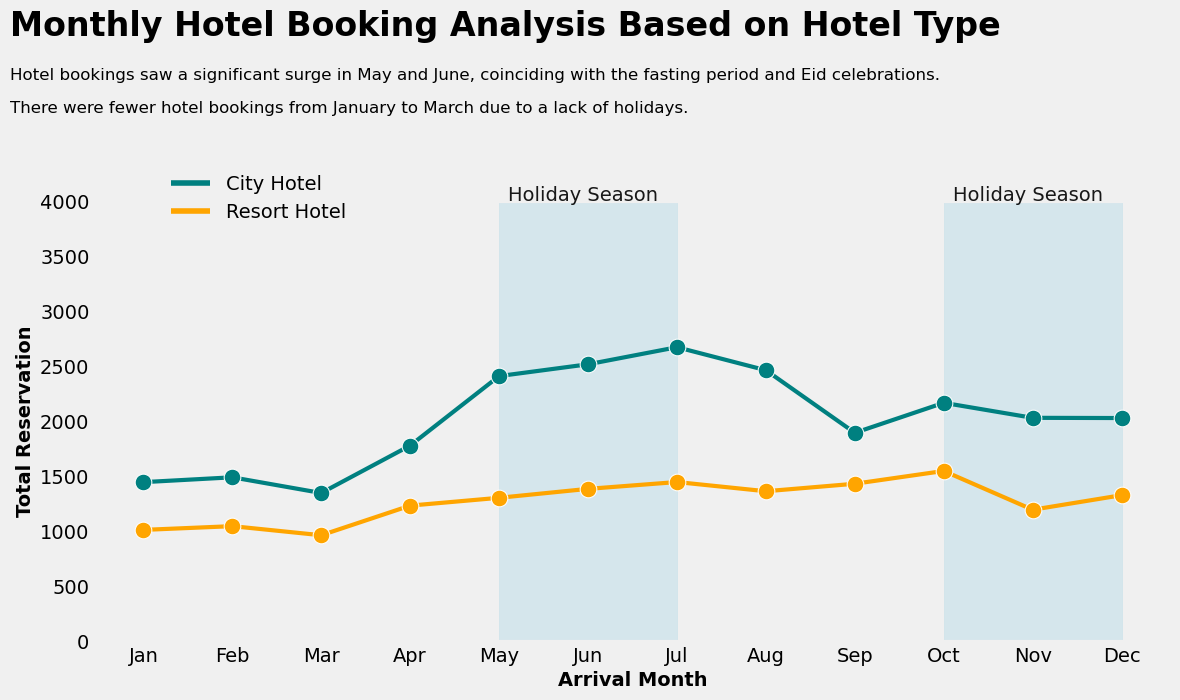

In [190]:
plt.rcdefaults()
import matplotlib.style as style
style.use('fivethirtyeight')

plt.figure(figsize=(12, 8))
sns.lineplot(data=norm_df, x="month", y="reservation", hue='hotel', lw=3, marker='o', markersize=12,
             palette=['teal', 'orange'])  # Mengganti warna plot

plt.tick_params(axis='both', which='major', labelsize=14)

plt.text(x=-1.5,y=5500, s='Monthly Hotel Booking Analysis Based on Hotel Type', fontsize=24, fontweight='bold')
plt.text(x=-1.5, y=5100, s='Hotel bookings saw a significant surge in May and June, coinciding with the fasting period and Eid celebrations.', fontsize=12)
plt.text(x=-1.5, y=4800, s='There were fewer hotel bookings from January to March due to a lack of holidays.', fontsize=12)

plt.axvspan(4, 6, color='lightblue', alpha=0.4)
plt.text(4.1, 4000, s='Holiday Season', alpha=0.9)
plt.axvspan(9, 11, color='lightblue', alpha=0.4)
plt.text(9.1, 4000, s='Holiday Season', alpha=0.9)

plt.legend(frameon=False, bbox_to_anchor=(0.25, 1.1))
plt.grid(False)

plt.xlabel('Arrival Month',weight='bold')
plt.ylabel('Total Reservation',weight='bold')
plt.ylim(0, 4000)
plt.tight_layout()
plt.show()  

- Pelanggan cenderung lebih memilih memesan hotel perkotaan dibandingkan hotel resort bisa disebabkan karena hotel perkotaan memiliki akses yang mudah di jangkau. 

- Terdapat peningkatan signifikan dalam pemesanan hotel pada bulan-bulan dengan liburan yang lebih panjang, seperti yang terlihat pada kenaikan pemesanan dari Mei hingga Juli, yang bertepatan dengan Hari Raya pada bulan Juni dan Juli.

- Kedua jenis hotel menunjukkan tren kenaikan yang serupa dari Januari hingga Agustus, tetapi hotel resort mengalami peningkatan pada bulan September, sedangkan hotel perkotaan mengalami penurunan. Kurangnya pemesanan pada bulan Januari hingga Maret kemungkinan disebabkan oleh kesibukan kerja dan minimnya hari libur.

## TASK 3

### Buatlah kolom baru yang berisi total durasi menginap.


In [39]:
df['total_stay_duration'] = df['stays_in_weekend_nights'] + df['stays_in_weekdays_nights']
df.sample(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_stay_duration
70924,City Hotel,0,7,2018,January,46,7,1,1,2,0.0,0,Breakfast,Kota Yogyakarta,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0.0,0,Personal,215.00,0,1,Check-Out,2
8597,Resort Hotel,1,67,2019,July,21,27,2,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0.0,0,Personal,115.00,0,2,Canceled,4
15171,Resort Hotel,0,45,2017,February,52,25,2,3,2,2.0,0,Breakfast,Kota Batu,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,196.0,0.0,0,Personal,46.00,0,0,Check-Out,5
76154,City Hotel,0,48,2019,May,10,10,0,2,2,0.0,0,Breakfast,Kota Surabaya,Online TA,TA/TO,0,0,0,1,No Deposit,9.0,0.0,0,Personal,97.20,0,0,Check-Out,2
11415,Resort Hotel,0,3,2017,December,40,1,0,1,1,0.0,0,Breakfast,Kota Denpasar,Corporate,Corporate,1,1,1,0,No Deposit,0.0,28.0,0,Family,48.00,0,0,Check-Out,1
42143,City Hotel,1,35,2018,October,36,28,2,1,2,1.0,0,Dinner,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0.0,0,Personal,171.45,0,0,Canceled,3
17514,Resort Hotel,0,76,2018,May,13,21,0,0,2,0.0,0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0.0,0,Personal,0.00,0,1,Check-Out,0
50947,City Hotel,1,54,2019,September,31,31,1,4,2,0.0,0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,83.0,0.0,0,Personal,131.20,0,0,Canceled,5
60993,City Hotel,0,91,2018,July,20,12,0,3,2,0.0,0,Breakfast,Kabupaten Sleman,Offline TA/TO,TA/TO,0,0,0,1,No Deposit,128.0,0.0,0,Family,80.75,0,0,Check-Out,3
75642,City Hotel,0,6,2019,May,9,2,0,1,2,0.0,0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0.0,0,Personal,108.00,0,1,Check-Out,1


### Kelompokkan nilai-nilai dari kolom baru pada langkah sebelumnya supaya lebih signifikan


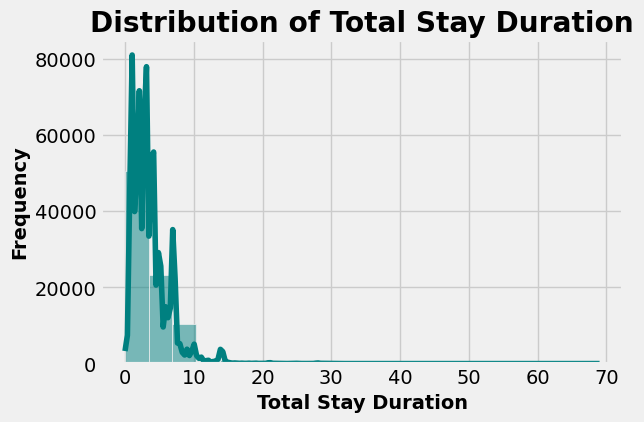

In [191]:
# Melihat persebaran data total stay duration
plt.figure(figsize=(6, 4))
plt.title('Distribution of Total Stay Duration',weight='bold')
sns.histplot(df['total_stay_duration'], kde=True, bins=20, color='teal')
plt.xlabel('Total Stay Duration',weight='bold')
plt.ylabel('Frequency',weight='bold')
plt.show()

- Persebaran data cenderung condong ke sisi kanan, dengan mayoritas data terfokus pada kisaran 0 hingga 5.
- Plot juga menunjukkan adanya pemesanan dengan durasi menginap lebih dari 10 hari. Agar analisis lebih mudah, kita dapat mengklasifikasikan data ini ke dalam kelompok berdasarkan ambang nilai tersebut.

In [42]:
#mengelompokkan data > 10 har
df['group_stay_day'] = df['total_stay_duration'].apply(lambda x: ">10" if x > 10 else x)
df.sample(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_stay_duration,group_stay_day
55535,City Hotel,1,97,2017,February,53,29,0,3,2,0.0,0,Breakfast,Kota Denpasar,Offline TA/TO,TA/TO,0,1,0,0,No Deposit,83.0,0.0,0,Personal,70.00,0,1,Canceled,3,3
23481,Resort Hotel,0,210,2018,November,40,30,3,7,2,0.0,0,Dinner,Kabupaten Bangka,Online TA,TA/TO,0,0,0,1,No Deposit,314.0,0.0,0,Personal,89.34,0,0,Check-Out,10,10
31516,Resort Hotel,0,47,2019,September,27,3,1,1,2,0.0,0,Breakfast,Kota Yogyakarta,Online TA,TA/TO,0,0,0,0,No Deposit,242.0,0.0,0,Personal,184.00,0,1,Check-Out,2,2
13289,Resort Hotel,0,64,2017,November,40,29,2,5,2,0.0,0,Breakfast,Kabupaten Bangka,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,2.0,0.0,0,Contract,42.50,0,0,Check-Out,7,7
33989,City Hotel,0,0,2017,October,33,10,1,2,2,0.0,0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0.0,0,Personal,115.00,1,0,Check-Out,3,3
46036,City Hotel,1,70,2019,April,7,16,0,3,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0.0,0,Personal,95.40,0,2,Canceled,3,3
81062,City Hotel,0,35,2019,August,23,5,1,0,2,0.0,0,No Meal,Kota Jakarta Timur,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,28.0,0.0,0,Personal,89.00,0,0,Check-Out,1,1
3893,Resort Hotel,1,191,2018,June,17,22,1,2,2,0.0,0,Full Board,Kota Denpasar,Offline TA/TO,TA/TO,0,0,0,1,No Deposit,0.0,0.0,0,Family,92.00,0,0,Canceled,3,3
6151,Resort Hotel,0,338,2018,November,38,16,2,5,2,0.0,0,Dinner,Kota Gorontalo,Offline TA/TO,TA/TO,0,0,0,1,No Deposit,171.0,0.0,0,Personal,96.40,0,0,Check-Out,7,7
79041,City Hotel,0,16,2019,July,18,1,1,1,2,0.0,0,No Meal,Kabupaten Garut,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0.0,0,Personal,120.00,0,2,Check-Out,2,2


In [43]:
#ambil kolom untuk diagregasi
booking_duration = ['is_canceled', 'group_stay_day', 'hotel']

#aggregasi kolom
canceled_df = df.pivot_table(index=['hotel','group_stay_day'], values='arrival_date_month', columns='is_canceled', aggfunc='count').reset_index()
canceled_df

is_canceled,hotel,group_stay_day,0,1
0,City Hotel,0,270,17
1,City Hotel,1,7855,2259
2,City Hotel,2,7383,3135
3,City Hotel,3,9142,4186
4,City Hotel,4,6450,3059
5,City Hotel,5,2898,1258
6,City Hotel,6,1027,612
7,City Hotel,7,1151,692
8,City Hotel,8,199,166
9,City Hotel,9,112,87


In [44]:
#persentase pembatalan
canceled_df.rename(columns={0:'not_canceled',1:'canceled'}, inplace=True)
canceled_df['canceled_pct'] = (canceled_df['canceled']/(canceled_df['canceled']+canceled_df['not_canceled'])*100)
canceled_df

is_canceled,hotel,group_stay_day,not_canceled,canceled,canceled_pct
0,City Hotel,0,270,17,5.923345
1,City Hotel,1,7855,2259,22.335377
2,City Hotel,2,7383,3135,29.806047
3,City Hotel,3,9142,4186,31.407563
4,City Hotel,4,6450,3059,32.169524
5,City Hotel,5,2898,1258,30.269490
6,City Hotel,6,1027,612,37.339841
7,City Hotel,7,1151,692,37.547477
8,City Hotel,8,199,166,45.479452
9,City Hotel,9,112,87,43.718593


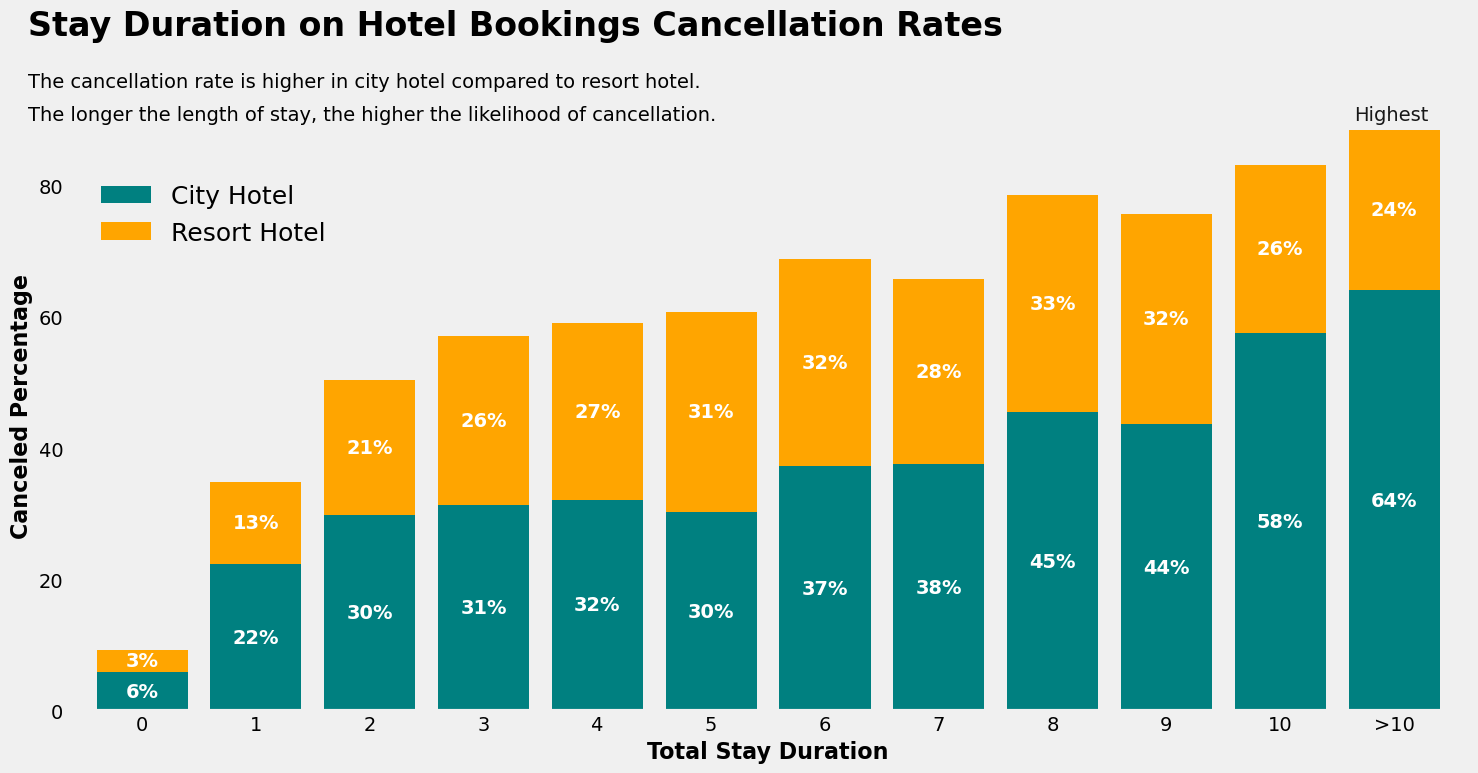

In [189]:
cancel_df = canceled_df.pivot(index="group_stay_day", columns="hotel", values="canceled_pct")
ax = cancel_df.plot(kind='bar', stacked=True, figsize=(15, 8), width=0.8, color=['teal', 'orange'])

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, 
            y + height / 2, 
            '{:.0f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center', 
            color='white', 
            weight='bold')

plt.text(x=-1, y=103, s='Stay Duration on Hotel Bookings Cancellation Rates', fontsize=24, fontweight='bold')
plt.text(x=-1, y=95, s='The cancellation rate is higher in city hotel compared to resort hotel.', fontsize=14)
plt.text(x=-1, y=90, s='The longer the length of stay, the higher the likelihood of cancellation.', fontsize=14)

# Annotasi di pojok kanan (perpendek tanda panah)
plt.text(10.65, 90, s='Highest', alpha=0.9)

plt.legend(frameon=False, bbox_to_anchor=(0.20, 0.9), fontsize=18)
plt.grid(False)
plt.ylabel('Canceled Percentage', fontsize=16, weight='bold')
plt.xlabel('Total Stay Duration', fontsize=16, weight='bold')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## TASK 4
Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate

#### Buatlah kolom baru yang berisi kategorisasi dari kolom jarak waktu pemesanan

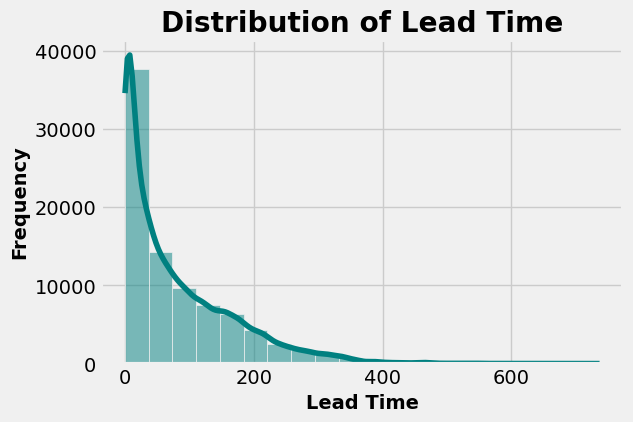

In [192]:
# Melihat persebaran data kolom lead_time
plt.figure(figsize=(6, 4))
plt.title('Distribution of Lead Time',weight='bold')
sns.histplot(df['lead_time'], kde=True, bins=20, color='teal')
plt.xlabel('Lead Time',weight='bold')
plt.ylabel('Frequency',weight='bold')
plt.show()

Berdasarkan distribusi data, terlihat bahwa mayoritas waktu pemesanan berkumpul dalam rentang 0–100 hari, yang menunjukkan condong ke sisi kanan. Terdapat beberapa kasus memiliki waktu pemesanan melebihi 365 hari. Maka perlu dilakukan pengelompokan data ke dalam kategori per kuartal untuk mempermuda proses analisis. 

In [172]:
#melakukan binning data
def binning_lead_time(x):
  if x <= 30:
    label = '1 Bulan'
  elif x > 30 and x <= 60:
    label = '2 Bulan'
  elif x > 60 and x <= 90:
    label = '3 Bulan'
  elif x > 90 and x <= 120:
    label = '4 Bulan'
  else:
    label = '> 5 Bulan'

  return label  

# apply func to new feature
df['lead_time_by_month'] = df['lead_time'].apply(lambda x:binning_lead_time(x))

#pivot table
leadtime_df = df.pivot_table(index=['hotel','lead_time_by_month'], values='arrival_date_month', columns='is_canceled', aggfunc='count').rename(columns={0:'not_canceled', 1:'canceled'}).reset_index()
leadtime_df

is_canceled,hotel,lead_time_by_month,not_canceled,canceled
0,City Hotel,1 Bulan,16303,3946
1,City Hotel,2 Bulan,5848,2885
2,City Hotel,3 Bulan,4084,2090
3,City Hotel,4 Bulan,3037,1684
4,City Hotel,> 5 Bulan,7449,5249
5,Resort Hotel,1 Bulan,12396,1700
6,Resort Hotel,2 Bulan,3134,1292
7,Resort Hotel,3 Bulan,2129,928
8,Resort Hotel,4 Bulan,1594,798
9,Resort Hotel,> 5 Bulan,6399,3163


In [203]:
#group by month
list_group_by_month = df['lead_time_by_month'].value_counts().index.to_list()

# Urutkan list kategori secara kustom dengan '> 5 Bulan' di paling kanan
custom_category_order = ['1 Bulan', '2 Bulan', '3 Bulan', '4 Bulan', '> 5 Bulan']
list_group_by_month = [cat for cat in custom_category_order if cat in list_group_by_month]

leadtime_df['lead_time_by_month'] = leadtime_df['lead_time_by_month'].astype('category')
leadtime_df['lead_time_by_month'] = leadtime_df['lead_time_by_month'].cat.set_categories(list_group_by_month)


leadtime_df['cancellation_ratio'] = (leadtime_df['canceled']/(leadtime_df['canceled']+leadtime_df['not_canceled']))*100 

leadtime_df


is_canceled,hotel,lead_time_by_month,not_canceled,canceled,canceled_pct,cancellation_ratio
0,City Hotel,1 Bulan,16303,3946,19.487382,19.487382
1,City Hotel,2 Bulan,5848,2885,33.035612,33.035612
2,City Hotel,3 Bulan,4084,2090,33.851636,33.851636
3,City Hotel,4 Bulan,3037,1684,35.670409,35.670409
4,City Hotel,> 5 Bulan,7449,5249,41.337218,41.337218
5,Resort Hotel,1 Bulan,12396,1700,12.060159,12.060159
6,Resort Hotel,2 Bulan,3134,1292,29.191143,29.191143
7,Resort Hotel,3 Bulan,2129,928,30.356559,30.356559
8,Resort Hotel,4 Bulan,1594,798,33.361204,33.361204
9,Resort Hotel,> 5 Bulan,6399,3163,33.078854,33.078854


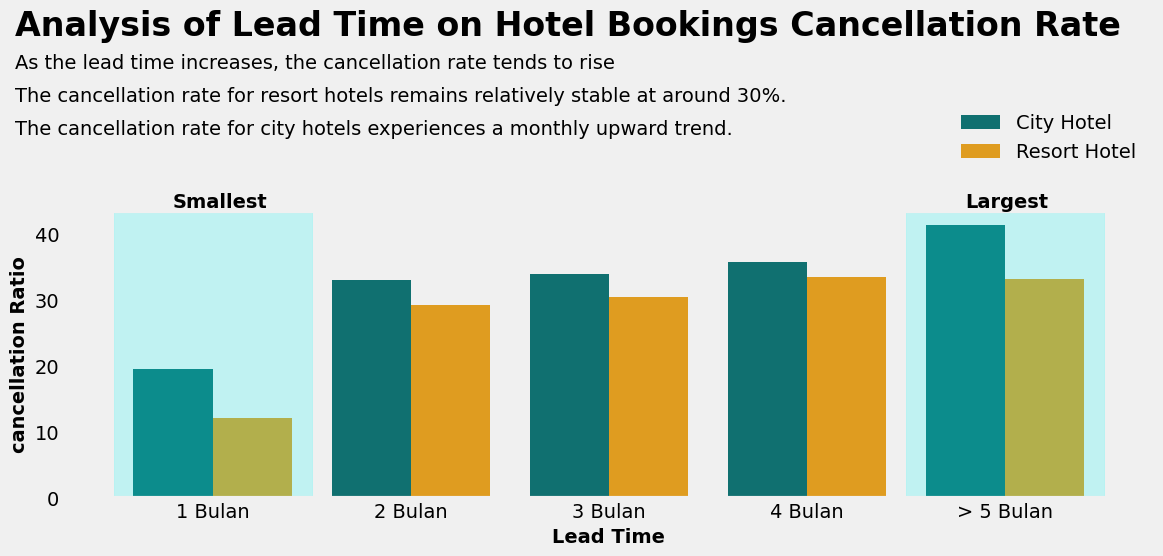

In [204]:
plt.figure(figsize=(12, 8))
sns.barplot(data=leadtime_df.sort_values(['hotel', 'lead_time_by_month']), x="lead_time_by_month", y="canceled_pct", hue='hotel', palette=['teal', 'orange'])

plt.text(x=-1, y=55 + move, s='Analysis of Lead Time on Hotel Bookings Cancellation Rate', fontsize=24, fontweight='bold')
plt.text(x=-1, y=50 + move, s='As the lead time increases, the cancellation rate tends to rise', fontsize=14)
plt.text(x=-1, y=45 + move, s='The cancellation rate for resort hotels remains relatively stable at around 30%.', fontsize=14)
plt.text(x=-1, y=40 + move, s='The cancellation rate for city hotels experiences a monthly upward trend.', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(False)
plt.legend(frameon=False, bbox_to_anchor=(1, 1.4), fontsize=14)
plt.axvspan(-0.5, 0.5, color='cyan', alpha=0.2)
plt.text(x=-0.2, y=44, s='Smallest', weight='bold')
plt.axvspan(3.5, 4.5, color='cyan', alpha=0.2)
plt.text(x=3.8, y=44, s='Largest', weight='bold')
plt.xlabel('Lead Time', weight='bold')
plt.ylabel('cancellation Ratio', weight='bold')
plt.tight_layout()
plt.show()
